In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
pd.set_option('display.max_columns', None)

Read in model ready data

In [85]:
data = pd.read_csv('../fraud_tools_team_ds_test/model_ready_data.csv')

In [86]:
data

,raw_log,user_id,timestamp,action,amount,currency,location,device,date,amount_in_dollars,hour,day,month,year,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg
0,2025-06-01 12:03:31 - user=user1000 - action=c...,user1000,2025-06-01 12:03:31,cashout,2981.21,$,london,samsung galaxy s10,2025-06-01,2981.2100,12,1,6,2025,-1.000000,False,True,high,smart,False,Low,2981.210000,0.000000
1,01/06/2025 19:19:50 ::: user1000 *** debit :::...,user1000,2025-06-01 19:19:50,debit,1267.67,€,manchester,xiaomi mi 11,2025-06-01,2028.2720,19,1,6,2025,7.271944,False,False,moderate,smart,False,Low,2981.210000,-952.938000
2,2025-06-02 19:52:44 | user: user1000 | txn: re...,user1000,2025-06-02 19:52:44,refund,3610.68,$,cardiff,huawei p30,2025-06-02,3610.6800,19,2,6,2025,24.548333,False,False,high,smart,False,Low,2504.741000,1105.939000
3,2025-06-03 10:11:53 - user=user1000 - action=c...,user1000,2025-06-03 10:11:53,cashout,4659.06,£,birmingham,nokia 3310,2025-06-03,6196.5498,10,3,6,2025,14.319167,False,True,high,non-smart,False,Low,2873.387333,3323.162467
4,2025-06-03 21:23:30 | user: user1000 | txn: ca...,user1000,2025-06-03 21:23:30,cashout,4063.97,£,liverpool,none,2025-06-03,5405.0801,21,3,6,2025,11.193611,False,False,high,non-smart,False,Low,3704.177950,1700.902150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,user1099 2025-07-24 14:45:45 refund 1420.36 li...,user1099,2025-07-24 14:45:45,refund,1420.36,none,liverpool,none,2025-07-24,1420.3600,14,24,7,2025,148.348333,True,False,high,non-smart,False,Low,2610.405450,-1190.045450
7770,2025-07-25 10:04:10 | user: user1099 | txn: de...,user1099,2025-07-25 10:04:10,debit,2847.84,€,none,pixel 6,2025-07-25,4556.5440,10,25,7,2025,19.306944,False,False,moderate,smart,True,Low,2578.242059,1978.301941
7771,2025-07-25 18:10:43::user1099::refund::2876.11...,user1099,2025-07-25 18:10:43,refund,2876.11,none,birmingham,iphone 13,2025-07-25,2876.1100,18,25,7,2025,8.109167,False,False,high,smart,False,Low,2630.302637,245.807363
7772,2025-07-27 11:55:14 - user=user1099 - action=d...,user1099,2025-07-27 11:55:14,debit,1299.55,€,none,iphone 13,2025-07-27,2079.2800,11,27,7,2025,41.741944,False,True,moderate,smart,False,Low,2636.605390,-557.325390


In [87]:
data.shape

(7774, 23)

In [88]:
data.isnull().sum()

raw_log                       0
user_id                       0
timestamp                     0
action                        0
amount                        0
currency                      0
location                      0
device                        0
date                          0
amount_in_dollars             0
hour                          0
day                           0
month                         0
year                          0
txn_time_diff_hours           0
is_same_location              0
is_atm                        0
transaction_risk              0
device_type                   0
is_same_device                0
hour_risk                     0
avg_prev_amount               0
amount_difference_from_avg    0
dtype: int64

In [89]:
data.columns

Index(['raw_log', 'user_id', 'timestamp', 'action', 'amount', 'currency',
       'location', 'device', 'date', 'amount_in_dollars', 'hour', 'day',
       'month', 'year', 'txn_time_diff_hours', 'is_same_location', 'is_atm',
       'transaction_risk', 'device_type', 'is_same_device', 'hour_risk',
       'avg_prev_amount', 'amount_difference_from_avg'],
      dtype='object')

In [90]:
# features needed for model
features = [
            'action', 'currency',
            'location', 'device','amount_in_dollars', 'hour', 'day',
             'txn_time_diff_hours', 'is_same_location', 'is_atm',
            'transaction_risk', 'device_type', 'is_same_device', 'hour_risk', 
            'avg_prev_amount', 'amount_difference_from_avg'
]

In [91]:
df = data[features]

In [92]:
df.shape

(7774, 16)

In [93]:
df.head()

,action,currency,location,device,amount_in_dollars,hour,day,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg
0,cashout,$,london,samsung galaxy s10,2981.2100,12,1,-1.000000,False,True,high,smart,False,Low,2981.210000,0.000000
1,debit,€,manchester,xiaomi mi 11,2028.2720,19,1,7.271944,False,False,moderate,smart,False,Low,2981.210000,-952.938000
2,refund,$,cardiff,huawei p30,3610.6800,19,2,24.548333,False,False,high,smart,False,Low,2504.741000,1105.939000
3,cashout,£,birmingham,nokia 3310,6196.5498,10,3,14.319167,False,True,high,non-smart,False,Low,2873.387333,3323.162467
4,cashout,£,liverpool,none,5405.0801,21,3,11.193611,False,False,high,non-smart,False,Low,3704.177950,1700.902150


In [94]:
one_hot_encode_features = ['action', 'location','device','is_atm', 'is_same_device','hour_risk','device_type', 'is_same_location']
label_encode = ['currency', 'transaction_risk']

In [95]:
for col in one_hot_encode_features:
    print(col, '>>>>', df[col].unique())

action >>>> ['cashout' 'debit' 'refund' 'withdrawal' 'deposit' 'top-up' 'purchase'
 'transfer']
location >>>> ['london' 'manchester' 'cardiff' 'birmingham' 'liverpool' 'leeds' 'none'
 'glasgow']
device >>>> ['samsung galaxy s10' 'xiaomi mi 11' 'huawei p30' 'nokia 3310' 'none'
 'pixel 6' 'iphone 13']
is_atm >>>> [ True False]
is_same_device >>>> [False  True]
hour_risk >>>> ['Low' 'High']
device_type >>>> ['smart' 'non-smart']
is_same_location >>>> [False  True]


In [96]:
for col in label_encode:
    print(col, '>>>>', df[col].unique())

currency >>>> ['$' '€' '£' 'none']
transaction_risk >>>> ['high' 'moderate' 'low']


# Encode Data

Label Encoder with Custom Label Map

In [97]:
def label_and_onhotencode_data(data):
    df = data.copy()
    currency_map = {
        'none': 0,    
        '$': 1,      
        '€': 2,       
        '£': 3        
    }
    transaction_risk_map = {
        'low': 1,
        'moderate':2,
        'high':3
    }
    df['currency'] = df['currency'].map(currency_map)
    df['transaction_risk'] = df['transaction_risk'].map(transaction_risk_map)
    one_hot_encode_features = ['action', 'location','device','is_atm', 'is_same_device','hour_risk','device_type', 'is_same_location']
    
    # initialize encoder
    onehotencoder = OneHotEncoder(drop='if_binary', sparse=False)

    # Fit and transform the data
    encoded_data = onehotencoder.fit_transform(df[one_hot_encode_features])
    encoded_cols = onehotencoder.get_feature_names_out(one_hot_encode_features)
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)
    final_df = pd.concat([df.drop(one_hot_encode_features, axis=1), encoded_df], axis=1)
    return final_df

In [98]:
encoded_df = label_and_onhotencode_data(df)

/opt/anaconda3/envs/moniepoint_venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:
encoded_df.head(2)

,currency,amount_in_dollars,hour,day,txn_time_diff_hours,transaction_risk,avg_prev_amount,amount_difference_from_avg,action_cashout,action_debit,action_deposit,action_purchase,action_refund,action_top-up,action_transfer,action_withdrawal,location_birmingham,location_cardiff,location_glasgow,location_leeds,location_liverpool,location_london,location_manchester,location_none,device_huawei p30,device_iphone 13,device_nokia 3310,device_none,device_pixel 6,device_samsung galaxy s10,device_xiaomi mi 11,is_atm_True,is_same_device_True,hour_risk_Low,device_type_smart,is_same_location_True
0,1,2981.210,12,1,-1.000000,3,2981.21,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2,2028.272,19,1,7.271944,2,2981.21,-952.938,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [100]:
encoded_df.shape

(7774, 36)

In [101]:
data['is_same_location'].value_counts()

is_same_location
False    6872
True      902
Name: count, dtype: int64

Define a function to perform only label encoding with custom labels for features with known order and sklearn label encoder for those without a known order

In [102]:
def label_encode(data):
    df = data.copy()
    currency_map = {
        'none': 0,    
        '$': 1,      
        '€': 2,       
        '£': 3        
    }
    transaction_risk_map = {
        'low': 1,
        'moderate':2,
        'high':3
    }
    is_atm = {
        False: 0,
        True: 1
    }
    is_same_device = {
        False: 0,
        True: 1
    }
    hour_risk = {
        "Low": 1,
        "High":2
    }
    device_type = {
        "smart":1,
        "non-smart":2
    }
    is_same_location = {
        False: 0,
        True: 1
    }

    df['currency'] = df['currency'].map(currency_map)
    df['transaction_risk'] = df['transaction_risk'].map(transaction_risk_map)
    df['is_atm'] = df['is_atm'].map(is_atm)
    df['is_same_device'] = df['is_same_device'].map(is_same_device)
    df['hour_risk'] = df['hour_risk'].map(hour_risk)
    df['device_type'] = df['device_type'].map(device_type)
    df['is_same_location'] = df['is_same_location'].map(is_same_location)

    label_encode_features = ['action', 'location','device']
    encoder = LabelEncoder()
    for col in label_encode_features:
        df[col] = encoder.fit_transform(df[col].astype(str))

    return df

In [103]:
label_encoded_df = label_encode(df)
label_encoded_df.head(3)

,action,currency,location,device,amount_in_dollars,hour,day,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg
0,0,1,5,5,2981.210,12,1,-1.000000,0,1,3,1,0,1,2981.210,0.000
1,1,2,6,6,2028.272,19,1,7.271944,0,0,2,1,0,1,2981.210,-952.938
2,4,1,1,0,3610.680,19,2,24.548333,0,0,3,1,0,1,2504.741,1105.939


# Model

# Isolation Forest

Train Isolation Forest on default parameters

In [104]:
default_iso_forest = IsolationForest(random_state = 365)

In [105]:
def train_model(model,dataframe, original_data):
    data = dataframe.copy()
    original_df = original_data.copy()
    model.fit(data)
    # add result to original and encoded data
    original_df['anomaly_score'] = model.decision_function(data)
    original_df['anomaly'] = model.predict(data)
    data['anomaly_score'] = model.decision_function(data)
    data['anomaly'] = model.predict(data.drop(['anomaly_score'],axis=1))
    return original_df, data 

In [106]:
original_data ,default_model_df = train_model(default_iso_forest, encoded_df, df)

In [107]:
default_model_df.head()

,currency,amount_in_dollars,hour,day,txn_time_diff_hours,transaction_risk,avg_prev_amount,amount_difference_from_avg,action_cashout,action_debit,action_deposit,action_purchase,action_refund,action_top-up,action_transfer,action_withdrawal,location_birmingham,location_cardiff,location_glasgow,location_leeds,location_liverpool,location_london,location_manchester,location_none,device_huawei p30,device_iphone 13,device_nokia 3310,device_none,device_pixel 6,device_samsung galaxy s10,device_xiaomi mi 11,is_atm_True,is_same_device_True,hour_risk_Low,device_type_smart,is_same_location_True,anomaly_score,anomaly
0,1,2981.2100,12,1,-1.000000,3,2981.210000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.027247,1
1,2,2028.2720,19,1,7.271944,2,2981.210000,-952.938000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.043575,1
2,1,3610.6800,19,2,24.548333,3,2504.741000,1105.939000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.044228,1
3,3,6196.5498,10,3,14.319167,3,2873.387333,3323.162467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.015157,-1
4,3,5405.0801,21,3,11.193611,3,3704.177950,1700.902150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.015439,1


In [108]:
original_data.head()

,action,currency,location,device,amount_in_dollars,hour,day,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg,anomaly_score,anomaly
0,cashout,$,london,samsung galaxy s10,2981.2100,12,1,-1.000000,False,True,high,smart,False,Low,2981.210000,0.000000,0.027247,1
1,debit,€,manchester,xiaomi mi 11,2028.2720,19,1,7.271944,False,False,moderate,smart,False,Low,2981.210000,-952.938000,0.043575,1
2,refund,$,cardiff,huawei p30,3610.6800,19,2,24.548333,False,False,high,smart,False,Low,2504.741000,1105.939000,0.044228,1
3,cashout,£,birmingham,nokia 3310,6196.5498,10,3,14.319167,False,True,high,non-smart,False,Low,2873.387333,3323.162467,-0.015157,-1
4,cashout,£,liverpool,none,5405.0801,21,3,11.193611,False,False,high,non-smart,False,Low,3704.177950,1700.902150,0.015439,1


In [109]:
default_model_df[default_model_df['anomaly'] == -1].head(10)

,currency,amount_in_dollars,hour,day,txn_time_diff_hours,transaction_risk,avg_prev_amount,amount_difference_from_avg,action_cashout,action_debit,action_deposit,action_purchase,action_refund,action_top-up,action_transfer,action_withdrawal,location_birmingham,location_cardiff,location_glasgow,location_leeds,location_liverpool,location_london,location_manchester,location_none,device_huawei p30,device_iphone 13,device_nokia 3310,device_none,device_pixel 6,device_samsung galaxy s10,device_xiaomi mi 11,is_atm_True,is_same_device_True,hour_risk_Low,device_type_smart,is_same_location_True,anomaly_score,anomaly
3,3,6196.5498,10,3,14.319167,3,2873.387333,3323.162467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.015157,-1
17,2,7260.3520,7,18,82.113056,1,3203.137659,4057.214341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.038813,-1
28,2,7514.8960,0,25,17.285278,1,3275.437000,4239.459000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012174,-1
39,0,1628.7100,23,30,18.912778,2,3240.444674,-1611.734674,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.009496,-1
43,2,6851.2320,12,3,25.204167,3,3221.133065,3630.098935,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.023475,-1
52,1,6.4300,17,11,40.167222,1,3313.193862,-3306.763862,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.003885,-1
75,0,761.7900,20,4,77.026667,3,4517.800000,-3756.010000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.017250,-1
76,2,335.2960,3,6,31.791111,3,2639.795000,-2304.499000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.018263,-1
78,3,5839.8571,13,12,114.142778,2,1540.917500,4298.939600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.000561,-1
88,0,920.4900,20,24,31.132222,1,2456.647986,-1536.157986,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,-0.012510,-1


Visualize Anomaly

In [110]:
def create_cluster_plot(data_frame, anomaly):
    df = data_frame.drop(['anomaly_score',anomaly], axis = 1)

    #initialize pca
    pca = PCA(n_components=2, random_state=360)

    #fit pca
    pca_array = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = pca_array)
    pca_df[anomaly] = data_frame[anomaly]  
    return pca_df

<Axes: xlabel='0', ylabel='1'>

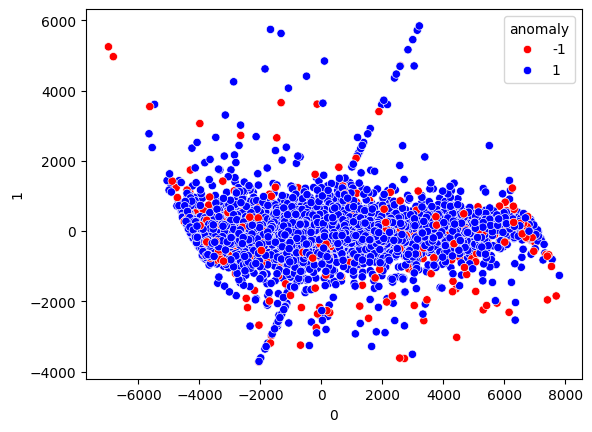

In [111]:
x = create_cluster_plot(default_model_df, anomaly='anomaly')
sns.scatterplot(x = x[0],y=x[1],hue=x["anomaly"],palette=["red", "blue"])

# Check Distribution of anolmaly score

<Axes: xlabel='anomaly_score', ylabel='Count'>

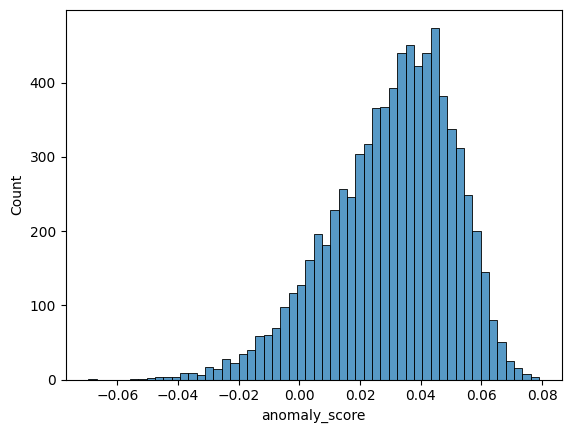

In [112]:
sns.histplot(default_model_df['anomaly_score'])

In [113]:
original_data[original_data['anomaly_score'] <= -0.01]['anomaly'].value_counts()

anomaly
-1    299
Name: count, dtype: int64

From the 2D PCA plot, some of the normal dataset might be classified as anomalies, so reducing the contermination level of isoforest below the current value is a good idea, also

Try on label encoded data only

In [114]:
original_data ,default_model_df = train_model(default_iso_forest, label_encoded_df, df)

<Axes: xlabel='0', ylabel='1'>

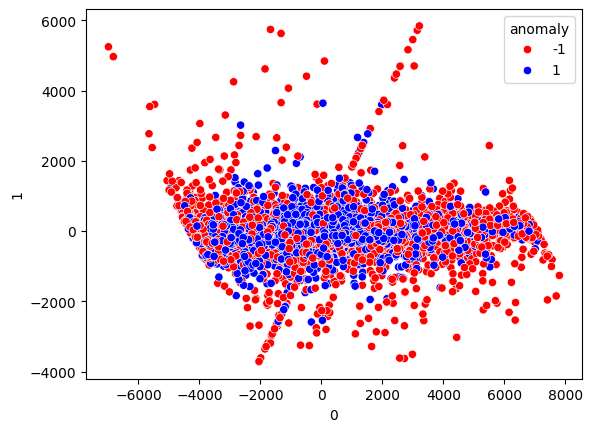

In [115]:
x = create_cluster_plot(default_model_df, anomaly='anomaly')
sns.scatterplot(x = x[0],y=x[1],hue=x["anomaly"],palette=["red", "blue"])

### Tune Hyper-parameters for both data samples

In [116]:
iso_forest_model = IsolationForest(random_state = 365, contamination=0.15)

In [117]:
encoded_df.shape, label_encoded_df.shape # onhot-encoded data and label-encoded data

((7774, 36), (7774, 16))

In [118]:
# on onehot-encoded data
original_data_1 ,onehot_result = train_model(iso_forest_model, encoded_df, df)

# on label-encoded data
original_data_1 ,label_encoded_result = train_model(iso_forest_model, label_encoded_df, df)

In [119]:
onehot_result.head(3)

,currency,amount_in_dollars,hour,day,txn_time_diff_hours,transaction_risk,avg_prev_amount,amount_difference_from_avg,action_cashout,action_debit,action_deposit,action_purchase,action_refund,action_top-up,action_transfer,action_withdrawal,location_birmingham,location_cardiff,location_glasgow,location_leeds,location_liverpool,location_london,location_manchester,location_none,device_huawei p30,device_iphone 13,device_nokia 3310,device_none,device_pixel 6,device_samsung galaxy s10,device_xiaomi mi 11,is_atm_True,is_same_device_True,hour_risk_Low,device_type_smart,is_same_location_True,anomaly_score,anomaly
0,1,2981.210,12,1,-1.000000,3,2981.210,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.018487,1
1,2,2028.272,19,1,7.271944,2,2981.210,-952.938,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.034814,1
2,1,3610.680,19,2,24.548333,3,2504.741,1105.939,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.035467,1


In [120]:
label_encoded_result.head(3)

,action,currency,location,device,amount_in_dollars,hour,day,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg,anomaly_score,anomaly
0,0,1,5,5,2981.210,12,1,-1.000000,0,1,3,1,0,1,2981.210,0.000,0.035516,1
1,1,2,6,6,2028.272,19,1,7.271944,0,0,2,1,0,1,2981.210,-952.938,0.092133,1
2,4,1,1,0,3610.680,19,2,24.548333,0,0,3,1,0,1,2504.741,1105.939,0.064962,1


<Axes: xlabel='0', ylabel='1'>

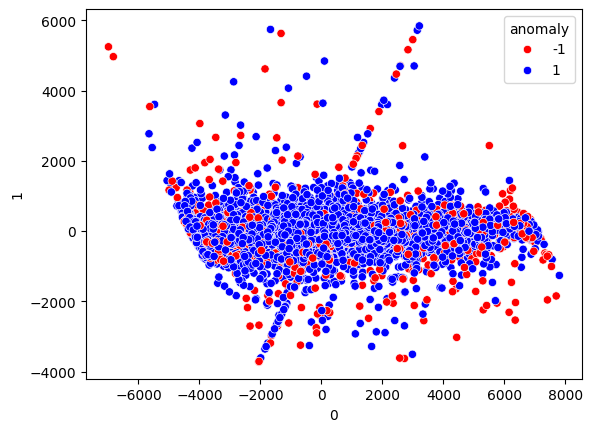

In [121]:
# plot pca for onehot-encoded data result
x = create_cluster_plot(onehot_result, anomaly='anomaly')
sns.scatterplot(x = x[0],y=x[1],hue=x["anomaly"],palette=["red", "blue"])

<Axes: xlabel='0', ylabel='1'>

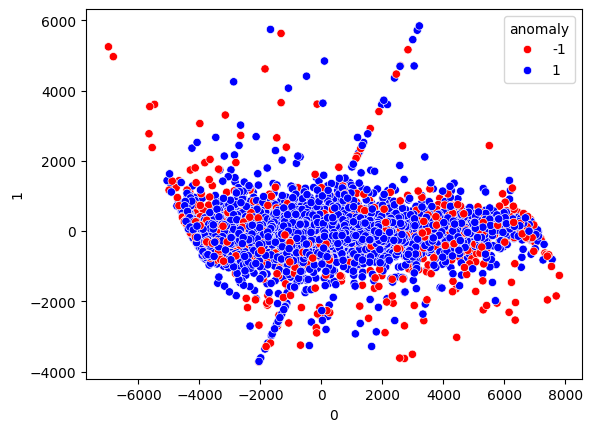

In [122]:
# plot pca for onehot-encoded data result
x = create_cluster_plot(label_encoded_result, anomaly='anomaly')
sns.scatterplot(x = x[0],y=x[1],hue=x["anomaly"],palette=["red", "blue"])

# DBScan

The performance of DBScan might be affected by one-hot-encoded features, due to their sparse nature

Perform on default Hyper-parameters and also, Scale numerical data

In [123]:
# define a function to scale non-onehotencoded numerical data

def scale_data(df):
    data = df.copy()
    scaler = StandardScaler()

    columns = ['amount_in_dollars', 'hour', 'day', 'txn_time_diff_hours', 'avg_prev_amount', 'amount_difference_from_avg']

    scaled_array = scaler.fit_transform(data[columns])
    scaled_df = pd.DataFrame(scaled_array, columns=[f"{col}_scaled" for col in columns], index=df.index)

    #  Combine scaled numerical with original data (dropping original numerics if you prefer)
    data = data.drop(columns, axis=1)
    merged_df = pd.concat([data, scaled_df], axis=1)

    return merged_df

In [124]:
encoded_df.head(2)

,currency,amount_in_dollars,hour,day,txn_time_diff_hours,transaction_risk,avg_prev_amount,amount_difference_from_avg,action_cashout,action_debit,action_deposit,action_purchase,action_refund,action_top-up,action_transfer,action_withdrawal,location_birmingham,location_cardiff,location_glasgow,location_leeds,location_liverpool,location_london,location_manchester,location_none,device_huawei p30,device_iphone 13,device_nokia 3310,device_none,device_pixel 6,device_samsung galaxy s10,device_xiaomi mi 11,is_atm_True,is_same_device_True,hour_risk_Low,device_type_smart,is_same_location_True
0,1,2981.210,12,1,-1.000000,3,2981.21,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2,2028.272,19,1,7.271944,2,2981.21,-952.938,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [125]:
scaled_data = scale_data(encoded_df)
scaled_data.head(3)

,currency,transaction_risk,action_cashout,action_debit,action_deposit,action_purchase,action_refund,action_top-up,action_transfer,action_withdrawal,location_birmingham,location_cardiff,location_glasgow,location_leeds,location_liverpool,location_london,location_manchester,location_none,device_huawei p30,device_iphone 13,device_nokia 3310,device_none,device_pixel 6,device_samsung galaxy s10,device_xiaomi mi 11,is_atm_True,is_same_device_True,hour_risk_Low,device_type_smart,is_same_location_True,amount_in_dollars_scaled,hour_scaled,day_scaled,txn_time_diff_hours_scaled,avg_prev_amount_scaled,amount_difference_from_avg_scaled
0,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.025331,0.080233,-1.710310,-0.797160,-0.094861,-0.000812
1,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.526651,1.088814,-1.710310,-0.394121,-0.094861,-0.491194
2,1,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.305819,1.088814,-1.594272,0.447646,-1.065344,0.568304


In [126]:
def default_dbscan(df):
    data = df.copy()

    # Apply DBSCAN with default parameters
    dbscan = DBSCAN()  # Default: eps=0.5, min_samples=5, metric='euclidean'
    clusters = dbscan.fit_predict(data)

    # Add cluster labels to DataFrame
    data['cluster'] = clusters
    return data

In [127]:
db_scan_df = default_dbscan(scaled_data)

In [128]:
db_scan_df['cluster'].value_counts()

cluster
-1    7774
Name: count, dtype: int64

DBScan is currently classifying all data samples as outliers, possibly a side effect from the data sparcity. Attempt on label encoded data and before tuning hyper-parameters

In [129]:
label_encoded_df.head(3)

,action,currency,location,device,amount_in_dollars,hour,day,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg
0,0,1,5,5,2981.210,12,1,-1.000000,0,1,3,1,0,1,2981.210,0.000
1,1,2,6,6,2028.272,19,1,7.271944,0,0,2,1,0,1,2981.210,-952.938
2,4,1,1,0,3610.680,19,2,24.548333,0,0,3,1,0,1,2504.741,1105.939


In [130]:
scaled_data = scale_data(label_encoded_df)
scaled_data.head(3)

,action,currency,location,device,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,amount_in_dollars_scaled,hour_scaled,day_scaled,txn_time_diff_hours_scaled,avg_prev_amount_scaled,amount_difference_from_avg_scaled
0,0,1,5,5,0,1,3,1,0,1,-0.025331,0.080233,-1.710310,-0.797160,-0.094861,-0.000812
1,1,2,6,6,0,0,2,1,0,1,-0.526651,1.088814,-1.710310,-0.394121,-0.094861,-0.491194
2,4,1,1,0,0,0,3,1,0,1,0.305819,1.088814,-1.594272,0.447646,-1.065344,0.568304


In [131]:
label_encoded_df.shape, scaled_data.shape

((7774, 16), (7774, 16))

In [132]:
db_scan_df = default_dbscan(scaled_data)

In [133]:
db_scan_df['cluster'].value_counts()

cluster
-1    7774
Name: count, dtype: int64

### Tune DBScan with KNN

For onehotencoded data

In [134]:
encoded_df.head()

,currency,amount_in_dollars,hour,day,txn_time_diff_hours,transaction_risk,avg_prev_amount,amount_difference_from_avg,action_cashout,action_debit,action_deposit,action_purchase,action_refund,action_top-up,action_transfer,action_withdrawal,location_birmingham,location_cardiff,location_glasgow,location_leeds,location_liverpool,location_london,location_manchester,location_none,device_huawei p30,device_iphone 13,device_nokia 3310,device_none,device_pixel 6,device_samsung galaxy s10,device_xiaomi mi 11,is_atm_True,is_same_device_True,hour_risk_Low,device_type_smart,is_same_location_True
0,1,2981.2100,12,1,-1.000000,3,2981.210000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2,2028.2720,19,1,7.271944,2,2981.210000,-952.938000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1,3610.6800,19,2,24.548333,3,2504.741000,1105.939000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3,6196.5498,10,3,14.319167,3,2873.387333,3323.162467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3,5405.0801,21,3,11.193611,3,3704.177950,1700.902150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [135]:
scaled_data = scale_data(df=encoded_df)

In [136]:
scaled_data.head(2)

,currency,transaction_risk,action_cashout,action_debit,action_deposit,action_purchase,action_refund,action_top-up,action_transfer,action_withdrawal,location_birmingham,location_cardiff,location_glasgow,location_leeds,location_liverpool,location_london,location_manchester,location_none,device_huawei p30,device_iphone 13,device_nokia 3310,device_none,device_pixel 6,device_samsung galaxy s10,device_xiaomi mi 11,is_atm_True,is_same_device_True,hour_risk_Low,device_type_smart,is_same_location_True,amount_in_dollars_scaled,hour_scaled,day_scaled,txn_time_diff_hours_scaled,avg_prev_amount_scaled,amount_difference_from_avg_scaled
0,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.025331,0.080233,-1.71031,-0.797160,-0.094861,-0.000812
1,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.526651,1.088814,-1.71031,-0.394121,-0.094861,-0.491194


In [137]:
scaled_data.shape

(7774, 36)

In [138]:
min_samples = (2 * encoded_df.shape[1] - 1)  # for a rough estimate, 2 times number of features
min_samples

71

In [139]:
neighbors = NearestNeighbors(n_neighbors=min_samples)
ngb = neighbors.fit(scaled_data)

In [140]:
distances, indices = ngb.kneighbors(scaled_data) 

In [141]:
distances

array([[0.00000000e+00, 1.99302939e+00, 2.02706033e+00, ...,
        2.73041448e+00, 2.73384962e+00, 2.73551791e+00],
       [0.00000000e+00, 1.70497763e+00, 1.83094187e+00, ...,
        2.65627187e+00, 2.66732182e+00, 2.66752887e+00],
       [8.42936970e-08, 2.17815440e+00, 2.19662672e+00, ...,
        2.80324293e+00, 2.80498537e+00, 2.80572978e+00],
       ...,
       [0.00000000e+00, 1.79828131e+00, 1.89709349e+00, ...,
        2.46392025e+00, 2.46576772e+00, 2.46933551e+00],
       [0.00000000e+00, 2.31410966e+00, 2.32184962e+00, ...,
        2.94721621e+00, 2.94797032e+00, 2.95252841e+00],
       [0.00000000e+00, 1.89397808e+00, 2.39452711e+00, ...,
        3.18684581e+00, 3.18987503e+00, 3.19421183e+00]])

In [142]:
np.sort(distances, axis=0)

array([[0.00000000e+00, 2.35198156e-01, 6.72672582e-01, ...,
        2.30770181e+00, 2.30984782e+00, 2.30994765e+00],
       [0.00000000e+00, 2.35198156e-01, 7.47325579e-01, ...,
        2.30814634e+00, 2.31061709e+00, 2.31181803e+00],
       [0.00000000e+00, 2.67216866e-01, 7.49819129e-01, ...,
        2.31261164e+00, 2.31289847e+00, 2.32011996e+00],
       ...,
       [1.68587394e-07, 4.57877173e+00, 5.22783270e+00, ...,
        9.12338465e+00, 9.13302354e+00, 9.13896696e+00],
       [1.68587394e-07, 4.99587298e+00, 5.22783270e+00, ...,
        9.38506070e+00, 9.38539184e+00, 9.43826412e+00],
       [1.68587394e-07, 5.67026436e+00, 6.09689403e+00, ...,
        1.29468164e+01, 1.29471711e+01, 1.29605358e+01]])

In [143]:
distances = distances[:, -1]

In [144]:
distances.shape

(7774,)

In [145]:
distances= pd.DataFrame(distances, columns=['distances'])

In [146]:
distances = distances.sort_values('distances', ignore_index=True)
distances.head(10)

,distances
0,2.309948
1,2.311818
2,2.320120
3,2.322502
4,2.322558
5,2.327881
6,2.333486
7,2.334303
8,2.336342
9,2.336894


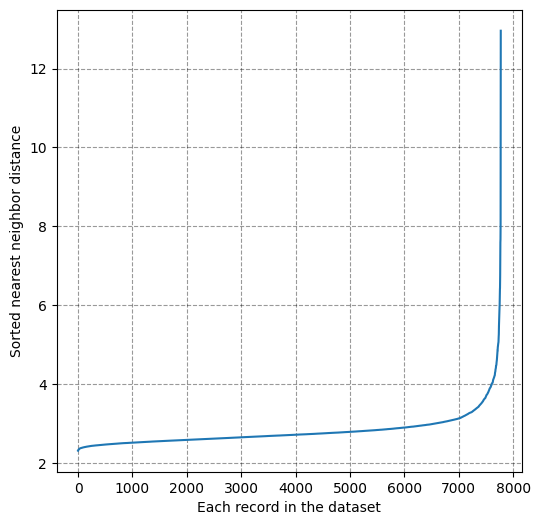

In [147]:
plt.figure(figsize=(6,6))
plt.plot(distances)
plt.xlabel('Each record in the dataset', fontsize=10)
plt.ylabel('Sorted nearest neighbor distance', fontsize=10)
plt.grid(True, linestyle="--", color='black', alpha=0.4)
plt.show()
plt.close()

with a Min_sample of 2N-1, experiment with eps values from 3 to 3.9 

In [148]:
def experiment_dbscan(df, eps_list ):
    data = df.copy()

    #fit pca
    pca = PCA(n_components=2, random_state=360)
    pca_array = pca.fit_transform(data)
    pca_df = pd.DataFrame(data = pca_array)

    figsize = (20, 10)
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=figsize)
    axes = axes.flatten()
    for index, eps in enumerate(eps_list):
        # Apply DBSCAN with default parameters
        dbscan = DBSCAN(eps=eps, min_samples= ((2 *data.shape[1]) - 1))  
        clusters = dbscan.fit_predict(data)

        # Add cluster labels to DataFrame
        pca_df['cluster'] = clusters

        # plot scatterplot
        sns.scatterplot(x = pca_df[0],y=pca_df[1],hue=pca_df["cluster"],palette=["red", "blue"], ax=axes[index])
        axes[index].set_title(f"eps = {eps:.2f}")
    plt.tight_layout()
    plt.show();

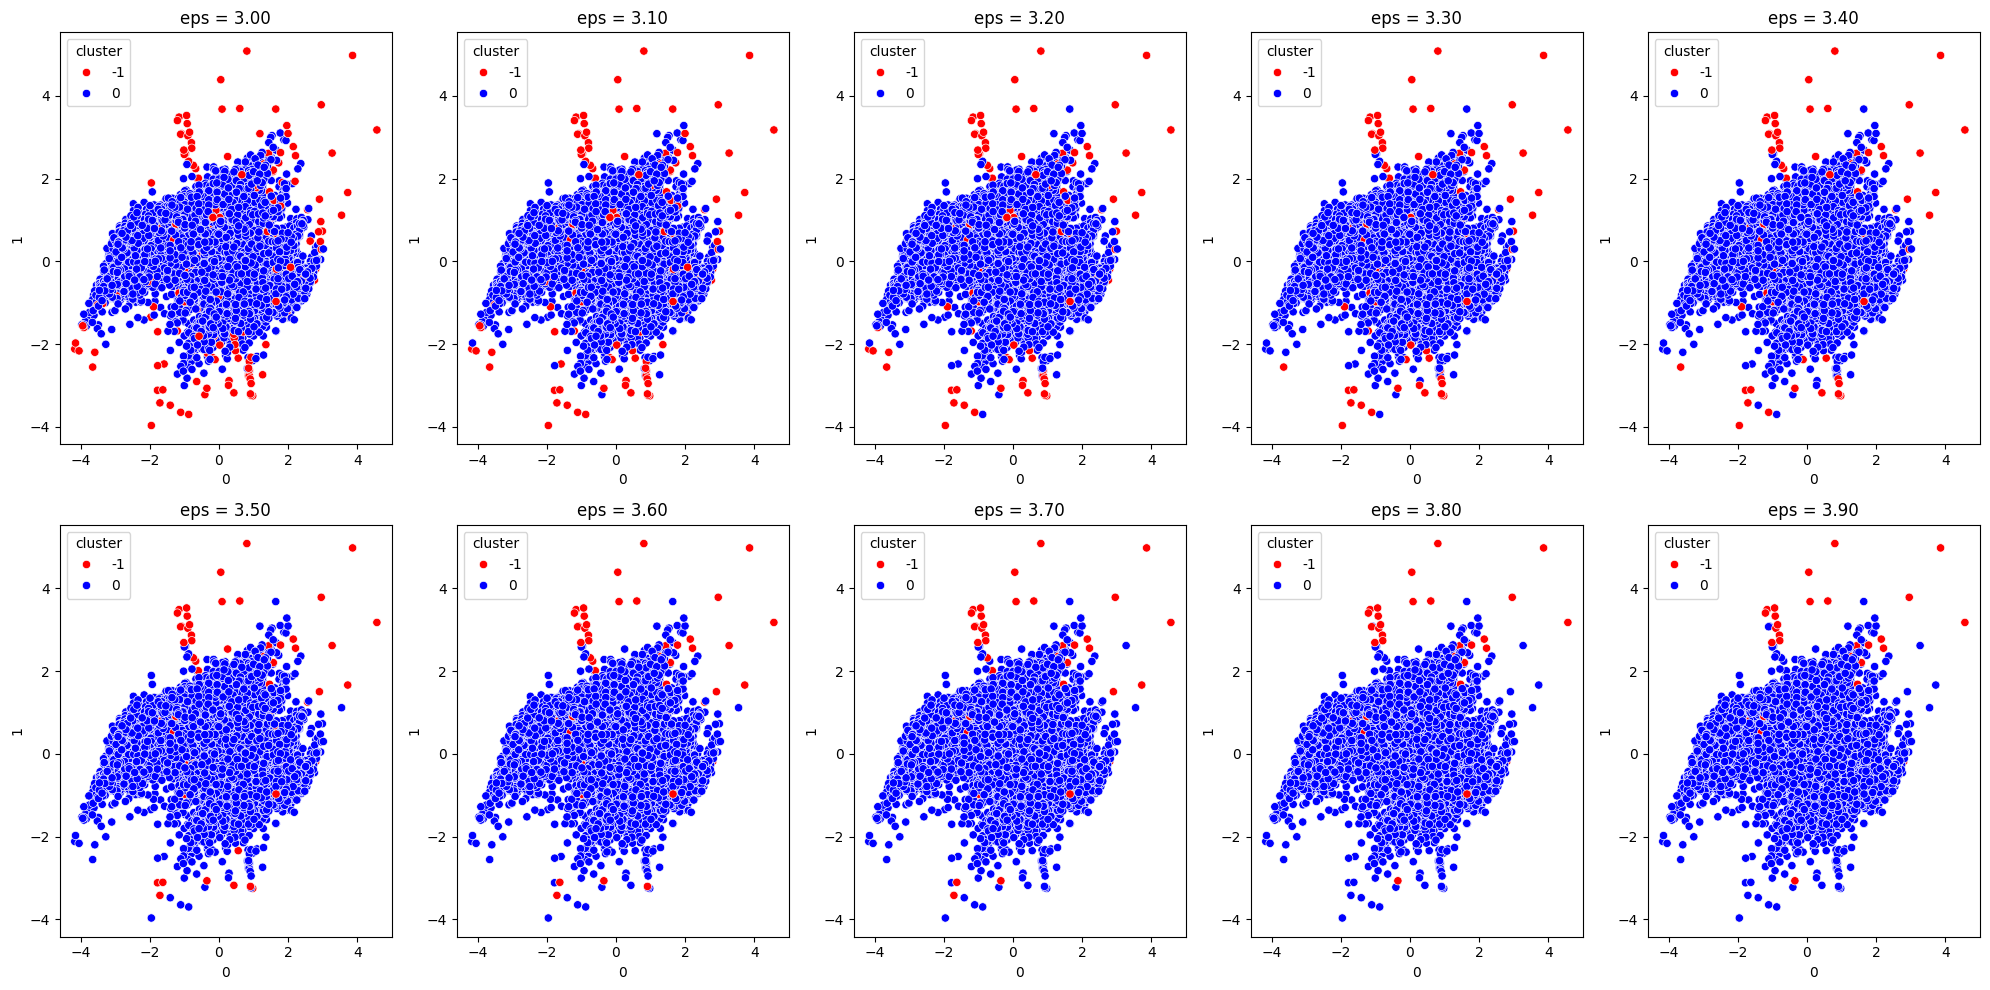

In [149]:
eps_list = [round(eps,2) for eps in np.arange(3, 4.0, 0.1)]
experiment_dbscan(scaled_data, eps_list)

From the above result, an Hyper-parameter that gives a reasonable number of True-positive to False-positive trade off should be considered. 

More Robust Rule based checks can be done to audit result from fraud model.

- An EPS of 3 is a safe value

# Final Model

# Train Final DBScan with EPS = 3.0

In [150]:
# data with relevant features
df

,action,currency,location,device,amount_in_dollars,hour,day,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg
0,cashout,$,london,samsung galaxy s10,2981.2100,12,1,-1.000000,False,True,high,smart,False,Low,2981.210000,0.000000
1,debit,€,manchester,xiaomi mi 11,2028.2720,19,1,7.271944,False,False,moderate,smart,False,Low,2981.210000,-952.938000
2,refund,$,cardiff,huawei p30,3610.6800,19,2,24.548333,False,False,high,smart,False,Low,2504.741000,1105.939000
3,cashout,£,birmingham,nokia 3310,6196.5498,10,3,14.319167,False,True,high,non-smart,False,Low,2873.387333,3323.162467
4,cashout,£,liverpool,none,5405.0801,21,3,11.193611,False,False,high,non-smart,False,Low,3704.177950,1700.902150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,refund,none,liverpool,none,1420.3600,14,24,148.348333,True,False,high,non-smart,False,Low,2610.405450,-1190.045450
7770,debit,€,none,pixel 6,4556.5440,10,25,19.306944,False,False,moderate,smart,True,Low,2578.242059,1978.301941
7771,refund,none,birmingham,iphone 13,2876.1100,18,25,8.109167,False,False,high,smart,False,Low,2630.302637,245.807363
7772,debit,€,none,iphone 13,2079.2800,11,27,41.741944,False,True,moderate,smart,False,Low,2636.605390,-557.325390


In [151]:
# encode data (categorical_data)
def label_and_onhotencode_data(data):
    df = data.copy()
    currency_map = {
        'none': 0,    
        '$': 1,      
        '€': 2,       
        '£': 3        
    }
    transaction_risk_map = {
        'low': 1,
        'moderate':2,
        'high':3
    }
    df['currency'] = df['currency'].map(currency_map)
    df['transaction_risk'] = df['transaction_risk'].map(transaction_risk_map)
    one_hot_encode_features = ['action', 'location','device','is_atm', 'is_same_device','hour_risk','device_type', 'is_same_location']
    
    # initialize encoder
    onehotencoder = OneHotEncoder(drop='if_binary', sparse=False)

    # Fit and transform the data
    encoded_data = onehotencoder.fit_transform(df[one_hot_encode_features])
    encoded_cols = onehotencoder.get_feature_names_out(one_hot_encode_features)
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)
    final_df = pd.concat([df.drop(one_hot_encode_features, axis=1), encoded_df], axis=1)
    return final_df


In [152]:
# scale data (numerical_data)
def scale_data(df):
    data = df.copy()
    scaler = StandardScaler()

    columns = ['amount_in_dollars', 'hour', 'day', 'txn_time_diff_hours', 'avg_prev_amount', 'amount_difference_from_avg']

    scaled_array = scaler.fit_transform(data[columns])
    scaled_df = pd.DataFrame(scaled_array, columns=[f"{col}_scaled" for col in columns], index=df.index)

    #  Combine scaled numerical with original data (dropping original numerics if you prefer)
    data = data.drop(columns, axis=1)
    merged_df = pd.concat([data, scaled_df], axis=1)

    return merged_df

In [153]:
encoded_df = label_and_onhotencode_data(df)
scaled_data = scale_data(encoded_df)

/opt/anaconda3/envs/moniepoint_venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [154]:
scaled_data

,currency,transaction_risk,action_cashout,action_debit,action_deposit,action_purchase,action_refund,action_top-up,action_transfer,action_withdrawal,location_birmingham,location_cardiff,location_glasgow,location_leeds,location_liverpool,location_london,location_manchester,location_none,device_huawei p30,device_iphone 13,device_nokia 3310,device_none,device_pixel 6,device_samsung galaxy s10,device_xiaomi mi 11,is_atm_True,is_same_device_True,hour_risk_Low,device_type_smart,is_same_location_True,amount_in_dollars_scaled,hour_scaled,day_scaled,txn_time_diff_hours_scaled,avg_prev_amount_scaled,amount_difference_from_avg_scaled
0,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.025331,0.080233,-1.710310,-0.797160,-0.094861,-0.000812
1,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.526651,1.088814,-1.710310,-0.394121,-0.094861,-0.491194
2,1,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.305819,1.088814,-1.594272,0.447646,-1.065344,0.568304
3,3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.666187,-0.207932,-1.478233,-0.050755,-0.314477,1.709288
4,3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.249813,1.376979,-1.478233,-0.203043,1.377696,0.874472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.846460,0.368399,0.958581,6.479625,-0.850124,-0.613210
7770,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.803417,-0.207932,1.074620,0.192267,-0.915635,1.017222
7771,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.080622,0.944731,1.074620,-0.353328,-0.809597,0.125680
7772,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.499817,-0.063849,1.306697,1.285381,-0.796759,-0.287612


In [155]:
def train_dbscan(df, eps, raw_data):
    data = df.copy()
    print(data.shape)
    
    # Apply DBSCAN with default parameters
    dbscan = DBSCAN(eps=eps, min_samples= ((2 *data.shape[1]) - 1))  
    clusters = dbscan.fit_predict(data)

    # Add cluster labels to DataFrame
    data['cluster'] = clusters
    raw_data['cluster'] = clusters
    return data, raw_data

In [156]:
dbscan_output, raw_data_output = train_dbscan(scaled_data, eps=3, raw_data=df)
dbscan_output['cluster'].value_counts()

(7774, 36)


/var/folders/_w/1qc94yn52j1dkjx4k5qt41sc0000gn/T/ipykernel_19701/3245987993.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['cluster'] = clusters


cluster
 0    7498
-1     276
Name: count, dtype: int64

In [157]:
def create_cluster_plot(data_frame, anomaly):
    df = data_frame.copy()
    df = df.drop([anomaly], axis = 1)

    #initialize pca
    pca = PCA(n_components=2, random_state=360)

    #fit pca
    pca_array = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = pca_array)
    pca_df[anomaly] = data_frame[anomaly]  
    return pca_df

<Axes: xlabel='0', ylabel='1'>

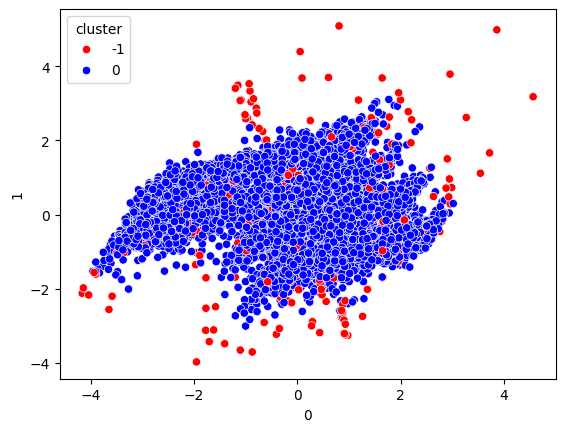

In [158]:
x = create_cluster_plot(dbscan_output, 'cluster')
sns.scatterplot(x = x[0],y=x[1],hue=x["cluster"],palette=["red", "blue"])

In [159]:
x

,0,1,cluster
0,0.120225,-0.509557,0
1,0.396926,0.669551,0
2,-0.482344,-1.025046,0
3,-2.866458,0.282928,0
4,-1.869160,1.320057,0
...,...,...,...
7769,1.648740,-0.971848,-1
7770,-1.483258,-0.219563,0
7771,0.476767,-1.378634,0
7772,0.212460,0.581278,0


# Inspect Result

In [160]:
raw_data_output.head()

,action,currency,location,device,amount_in_dollars,hour,day,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg,cluster
0,cashout,$,london,samsung galaxy s10,2981.2100,12,1,-1.000000,False,True,high,smart,False,Low,2981.210000,0.000000,0
1,debit,€,manchester,xiaomi mi 11,2028.2720,19,1,7.271944,False,False,moderate,smart,False,Low,2981.210000,-952.938000,0
2,refund,$,cardiff,huawei p30,3610.6800,19,2,24.548333,False,False,high,smart,False,Low,2504.741000,1105.939000,0
3,cashout,£,birmingham,nokia 3310,6196.5498,10,3,14.319167,False,True,high,non-smart,False,Low,2873.387333,3323.162467,0
4,cashout,£,liverpool,none,5405.0801,21,3,11.193611,False,False,high,non-smart,False,Low,3704.177950,1700.902150,0


In [161]:
anomalies = raw_data_output[raw_data_output['cluster'] == -1]

In [162]:
anomalies.shape

(276, 17)

In [163]:
anomalies.head(3)

,action,currency,location,device,amount_in_dollars,hour,day,txn_time_diff_hours,is_same_location,is_atm,transaction_risk,device_type,is_same_device,hour_risk,avg_prev_amount,amount_difference_from_avg,cluster
17,deposit,€,cardiff,none,7260.3520,7,18,82.113056,False,True,low,non-smart,False,Low,3203.137659,4057.214341,-1
75,transfer,none,glasgow,none,761.7900,20,4,77.026667,False,False,high,non-smart,False,Low,4517.800000,-3756.010000,-1
78,debit,£,liverpool,samsung galaxy s10,5839.8571,13,12,114.142778,False,False,moderate,smart,False,Low,1540.917500,4298.939600,-1


In [164]:
for col in anomalies.select_dtypes(exclude=[int, float]):
    print(anomalies[col].value_counts())
    print(" ")

action
debit         48
purchase      41
transfer      38
top-up        35
refund        30
deposit       29
cashout       28
withdrawal    27
Name: count, dtype: int64
 
currency
£       81
none    70
€       66
$       59
Name: count, dtype: int64
 
location
liverpool     43
none          39
cardiff       38
london        36
leeds         34
manchester    33
birmingham    27
glasgow       26
Name: count, dtype: int64
 
device
none                  57
samsung galaxy s10    41
nokia 3310            40
huawei p30            38
pixel 6               35
iphone 13             33
xiaomi mi 11          32
Name: count, dtype: int64
 
is_same_location
False    243
True      33
Name: count, dtype: int64
 
is_atm
False    241
True      35
Name: count, dtype: int64
 
transaction_risk
high        123
moderate     89
low          64
Name: count, dtype: int64
 
device_type
smart        179
non-smart     97
Name: count, dtype: int64
 
is_same_device
False    268
True       8
Name: count, dtype: int64

In [196]:
x = anomalies[
            (anomalies['is_same_location'] == False) &
           (anomalies['is_atm'] == True) &
            (anomalies['transaction_risk'] == 'high') 
            & (anomalies['is_same_device'] == False) 
            & (anomalies['hour_risk'] == 'High')
            #& (anomalies['device_type'] == 'non-smart')
          ]

x.shape

(6, 17)

In [170]:
for col in x.select_dtypes(exclude=[int, float]):
    print(x[col].value_counts())
    print(" ")

action
refund        12
transfer      12
cashout        8
withdrawal     5
Name: count, dtype: int64
 
currency
$       11
€       10
£        8
none     8
Name: count, dtype: int64
 
location
london        7
manchester    5
liverpool     5
glasgow       5
cardiff       4
birmingham    4
leeds         4
none          3
Name: count, dtype: int64
 
device
huawei p30            8
none                  8
xiaomi mi 11          6
pixel 6               5
samsung galaxy s10    4
nokia 3310            3
iphone 13             3
Name: count, dtype: int64
 
is_same_location
False    37
Name: count, dtype: int64
 
is_atm
False    37
Name: count, dtype: int64
 
transaction_risk
high    37
Name: count, dtype: int64
 
device_type
smart        26
non-smart    11
Name: count, dtype: int64
 
is_same_device
False    37
Name: count, dtype: int64
 
hour_risk
High    37
Name: count, dtype: int64
 


# Recommendation

A Hybrid system is recommended (combination of machine learning approach and Rule based system developed from business understanding/need).
Interaction between fraud indicators would be considered to create different sensitivity class

- Transactions to block
- Transactions that requires 2FA
- Transactions that should be reviewed
- Transactions that needs monitoring

Blocked Transactions (combination of all below):
- is_same_location =  False
- is_atm = False           
- transaction risk = High            
- is_same_device = False           
- hour_risk = High            

Transactions that require 2FA:
- transaction_risk = High
- is_same_location = False
- is_same_device = False
- hour_risk = High

Transactions to place on Review:
- transaction_risk = High
- hour_risk = High
- device_type = Non-Smart

Every other transaction can be placed on Monitored